In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None

In [3]:
data = pd.read_csv('medical_clean.csv')

In [4]:
data = data.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','County','Zip','Lat','Lng','Population','TimeZone','Job'])

In [5]:
data

,State,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,item1,item2,item3,item4,item5,item6,item7,item8
0,AL,Suburban,1,53,86575.93000,Divorced,Male,No,19.14147,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.58577,3726.70286,17939.40342,3,3,2,2,4,3,3,4
1,FL,Urban,3,51,46805.99000,Married,Female,No,18.94035,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.12956,4193.19046,17612.99812,3,4,3,4,4,4,3,3
2,SD,Suburban,3,53,14370.14000,Widowed,Female,No,18.05751,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.77218,2434.23422,17505.19246,2,4,4,4,3,4,3,3
3,MN,Suburban,0,78,39741.49000,Married,Male,No,16.57686,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.71488,2127.83042,12993.43735,3,5,5,3,4,5,5,5
4,VA,Rural,1,22,1209.56000,Widowed,Female,No,17.43907,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.25481,2113.07327,3716.52579,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NC,Urban,2,25,45967.61000,Widowed,Male,No,16.98086,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.56122,6850.94200,8927.64200,3,2,2,3,4,3,4,2
9996,NJ,Urban,4,87,14983.02000,Widowed,Male,Yes,18.17702,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.66824,7741.69000,28507.15000,3,3,4,2,5,3,4,4
9997,TN,Rural,3,45,65917.81000,Separated,Female,Yes,17.12907,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.15418,8276.48100,15281.21000,3,3,3,4,4,2,3,2
9998,SD,Rural,3,43,29702.32000,Divorced,Male,Yes,19.91043,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.35690,7644.48300,7781.67800,5,5,3,4,4,3,4,3


In [6]:
cat_columns = data.select_dtypes(['object']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [7]:
data

,State,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,item1,item2,item3,item4,item5,item6,item7,item8
0,0,0,1,53,86575.93000,0,0,0,19.14147,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.58577,3726.70286,17939.40342,3,3,2,2,4,3,3,4
1,1,1,3,51,46805.99000,1,1,0,18.94035,4,2,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,15.12956,4193.19046,17612.99812,3,4,3,4,4,4,3,3
2,2,0,3,53,14370.14000,2,1,0,18.05751,4,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,4.77218,2434.23422,17505.19246,2,4,4,4,3,4,3,3
3,3,0,0,78,39741.49000,1,0,0,16.57686,4,1,0,0,1,1,1,0,0,0,1,0,1,1,1,1,0,0,1.71488,2127.83042,12993.43735,3,5,5,3,4,5,5,5
4,4,2,1,22,1209.56000,2,1,0,17.43907,5,0,2,1,1,1,0,2,0,1,1,1,1,1,0,0,1,2,1.25481,2113.07327,3716.52579,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31,1,2,25,45967.61000,2,0,0,16.98086,4,2,1,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,51.56122,6850.94200,8927.64200,3,2,2,3,4,3,4,2
9996,37,1,4,87,14983.02000,2,0,1,18.17702,5,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,2,68.66824,7741.69000,28507.15000,3,3,4,2,5,3,4,4
9997,33,2,3,45,65917.81000,4,1,1,17.12907,4,2,0,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,70.15418,8276.48100,15281.21000,3,3,3,4,4,2,3,2
9998,2,2,3,43,29702.32000,0,0,1,19.91043,5,2,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,63.35690,7644.48300,7781.67800,5,5,3,4,4,3,4,3


In [8]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,State,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,item1,item2,item3,item4,item5,item6,item7,item8
0,0.00000,0.00000,0.00001,0.00060,0.97833,0.00000,0.00000,0.00000,0.00022,0.00007,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00012,0.04211,0.20272,0.00003,0.00003,0.00002,0.00002,0.00005,0.00003,0.00003,0.00005
1,0.00002,0.00002,0.00006,0.00102,0.93266,0.00002,0.00002,0.00000,0.00038,0.00008,0.00004,0.00002,0.00000,0.00000,0.00000,0.00000,0.00002,0.00002,0.00002,0.00002,0.00000,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00030,0.08355,0.35096,0.00006,0.00008,0.00006,0.00008,0.00008,0.00008,0.00006,0.00006
2,0.00009,0.00000,0.00013,0.00233,0.63086,0.00009,0.00004,0.00000,0.00079,0.00018,0.00004,0.00000,0.00000,0.00004,0.00000,0.00000,0.00000,0.00004,0.00004,0.00000,0.00000,0.00004,0.00004,0.00004,0.00000,0.00004,0.00000,0.00021,0.10687,0.76850,0.00009,0.00018,0.00018,0.00018,0.00013,0.00018,0.00013,0.00013
3,0.00007,0.00000,0.00000,0.00186,0.94926,0.00002,0.00000,0.00000,0.00040,0.00010,0.00002,0.00000,0.00000,0.00002,0.00002,0.00002,0.00000,0.00000,0.00000,0.00002,0.00000,0.00002,0.00002,0.00002,0.00002,0.00000,0.00000,0.00004,0.05082,0.31036,0.00007,0.00012,0.00012,0.00007,0.00010,0.00012,0.00012,0.00012
4,0.00090,0.00045,0.00023,0.00495,0.27223,0.00045,0.00023,0.00000,0.00392,0.00113,0.00000,0.00045,0.00023,0.00023,0.00023,0.00000,0.00045,0.00000,0.00023,0.00023,0.00023,0.00023,0.00023,0.00000,0.00000,0.00023,0.00045,0.00028,0.47558,0.83646,0.00045,0.00023,0.00068,0.00068,0.00113,0.00068,0.00090,0.00068


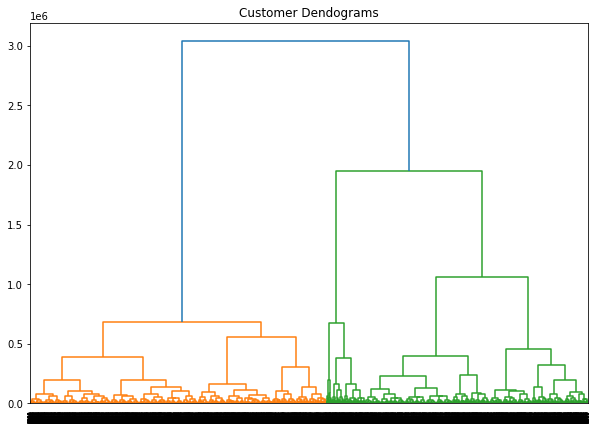

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)

array([0, 0, 1, ..., 0, 1, 0])

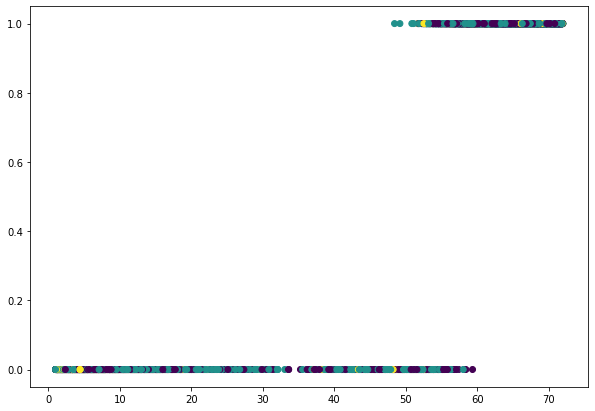

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['Initial_days'], data['ReAdmis'], c=cluster.labels_) 

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [16]:
mergings = linkage(data_scaled, method='complete')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [80.0, 80.0, 103.75, 103.75],
  [60.0, 60.0, 91.875, 91.875],
  [21.25, 21.25, 75.9375, 75.9375],
  [135.0, 135.0, 145.0, 145.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [140.0, 140.0, 163.75, 163.75],
  [48.59375, 48.59375, 151.875, 151.875],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [202.5, 202.5, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [216.25, 216.25, 261.25, 261.25],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [335.0, 335.0, 345.0, 345.0],
  [355

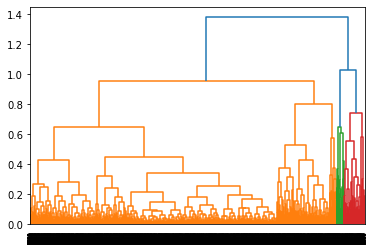

In [18]:
dendrogram(mergings)